# Named Entity Recognition (NER) with Visualizations 📊

This notebook demonstrates a complete workflow for extracting named entities from a news article. We will simulate a real-world scenario by fetching and cleaning an article, then applying a pre-trained Natural Language Processing (NLP) model to identify entities like people, organizations, locations, and dates.

**Objective:** To identify key information from unstructured text and visualize the results for better interpretation and analysis.

**Libraries Used:**
- `BeautifulSoup`: To parse and clean HTML.
- `spaCy`: For state-of-the-art NLP, including tokenization and NER.
- `pandas`: For organizing and displaying the extracted entities.
- `matplotlib` & `seaborn`: For creating charts to visualize entity frequencies.

## 1. Setup and Installation

First, we need to install the necessary Python libraries and download the `spaCy` English language model. The `en_core_web_sm` is a small, efficient model perfect for general-purpose NER. We'll also install plotting libraries.

In [1]:
# Install necessary libraries
!pip install spacy pandas beautifulsoup4 matplotlib seaborn

# Download the spaCy English model
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 105.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


---

## 2. Fetch and Preprocess the Article

To ensure this notebook is self-contained and works consistently, we will simulate fetching a news article. We'll define an HTML string representing a fictional article from **August 2025** and then use `BeautifulSoup` to parse it and extract clean, plain text.

In [2]:
from bs4 import BeautifulSoup
import spacy
import pandas as pd
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns

# Fictional news article HTML content for demonstration
html_content = """
<!DOCTYPE html>
<html>
<head><title>Tech News Today</title></head>
<body>
    <h1>InnovateCorp to Acquire QuantumLeap AI for $15 Billion in Landmark Deal</h1>
    <p class="author">By Alex Johnson</p>
    <p class="date">Published on August 7, 2025</p>
    <div class="article-body">
        <p><strong>Bengaluru, India</strong> – Tech giant <strong>InnovateCorp</strong> announced today its definitive agreement to acquire <strong>QuantumLeap AI</strong>, a pioneering startup from Silicon Valley, for an astounding <strong>$15 billion</strong>. The deal, which was approved by both boards, is expected to close in the fourth quarter of 2025.</p>
        <p>The acquisition is one of the largest in the tech sector this decade. InnovateCorp's CEO, <strong>Dr. Anya Sharma</strong>, stated that the purchase would accelerate their development of next-generation AI. "QuantumLeap AI's 'Prometheus' platform is revolutionary. We are thrilled to welcome their team of over 500 employees," she said in a press conference held this morning.</p>
        <p><strong>David Chen</strong>, the founder of QuantumLeap AI, will join InnovateCorp's executive team. The transaction is valued at <strong>$250 per share</strong> and is pending regulatory approval from the <strong>U.S. Securities and Exchange Commission</strong>. Analysts expect the stock, traded on NASDAQ, to react positively when markets open tomorrow.</p>
    </div>
</body>
</html>
"""

# Use BeautifulSoup to parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.find('div', class_='article-body').get_text(separator=' ', strip=True)

print("--- Cleaned Article Text ---")
print(article_text)

--- Cleaned Article Text ---
Bengaluru, India – Tech giant InnovateCorp announced today its definitive agreement to acquire QuantumLeap AI , a pioneering startup from Silicon Valley, for an astounding $15 billion . The deal, which was approved by both boards, is expected to close in the fourth quarter of 2025. The acquisition is one of the largest in the tech sector this decade. InnovateCorp's CEO, Dr. Anya Sharma , stated that the purchase would accelerate their development of next-generation AI. "QuantumLeap AI's 'Prometheus' platform is revolutionary. We are thrilled to welcome their team of over 500 employees," she said in a press conference held this morning. David Chen , the founder of QuantumLeap AI, will join InnovateCorp's executive team. The transaction is valued at $250 per share and is pending regulatory approval from the U.S. Securities and Exchange Commission . Analysts expect the stock, traded on NASDAQ, to react positively when markets open tomorrow.


---

## 3. NLP Processing with spaCy

Now we load our `spaCy` model and process the cleaned text. This single step handles tokenization, part-of-speech tagging, dependency parsing, and named entity recognition.

In [3]:
# Load the pre-trained English model
nlp = spacy.load('en_core_web_sm')

# Process the cleaned text with the spacy model
doc = nlp(article_text)

print("NLP processing complete. The 'doc' object is ready.")

NLP processing complete. The 'doc' object is ready.


---

## 4. Identify, Extract, and Tabulate Entities

The processed `doc` object contains the recognized entities in its `doc.ents` attribute. We'll extract these into a `pandas` DataFrame, which makes the data easy to read, sort, and use for our visualizations.

In [4]:
# Create a list to hold our entities
entities = []
# Iterate through the entities identified by the model
for ent in doc.ents:
    entities.append({
        'Text': ent.text,
        'Label': ent.label_,
        'Explanation': spacy.explain(ent.label_)
    })

# Create a Pandas DataFrame
df_entities = pd.DataFrame(entities)

print("--- Extracted Named Entities (Table View) ---")
df_entities

--- Extracted Named Entities (Table View) ---


,Text,Label,Explanation
0,Bengaluru,GPE,"Countries, cities, states"
1,India,GPE,"Countries, cities, states"
2,InnovateCorp,ORG,"Companies, agencies, institutions, etc."
3,today,DATE,Absolute or relative dates or periods
4,QuantumLeap AI,ORG,"Companies, agencies, institutions, etc."
5,Silicon Valley,LOC,"Non-GPE locations, mountain ranges, bodies of ..."
6,an astounding $15 billion,MONEY,"Monetary values, including unit"
7,the fourth quarter of 2025,DATE,Absolute or relative dates or periods
8,this decade,DATE,Absolute or relative dates or periods
9,InnovateCorp,ORG,"Companies, agencies, institutions, etc."


---

## 5. Visualizations 🖼️

Visualizing the results is crucial for understanding the model's output. We will create two types of visualizations:
1.  **Inline Entity Highlighting**: To see the entities in their original context.
2.  **Entity Frequency Chart**: To get a high-level summary of what the article is about.

### 5.1. Inline Entity Visualization

`spaCy`'s built-in `displacy` tool is perfect for highlighting entities directly within the text. This gives an intuitive and clear view of the model's performance on a granular level.

In [5]:
# Use displacy to render the text with named entities highlighted
displacy.render(doc, style='ent', jupyter=True)

### 5.2. Entity Frequency Visualization

A bar chart showing the count of each entity type gives us a birds-eye view of the article's content. A high number of `ORG` and `MONEY` entities, for example, strongly suggests a business or financial news story.

/tmp/ipython-input-1421307028.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_counts.index, y=entity_counts.values, palette='viridis')


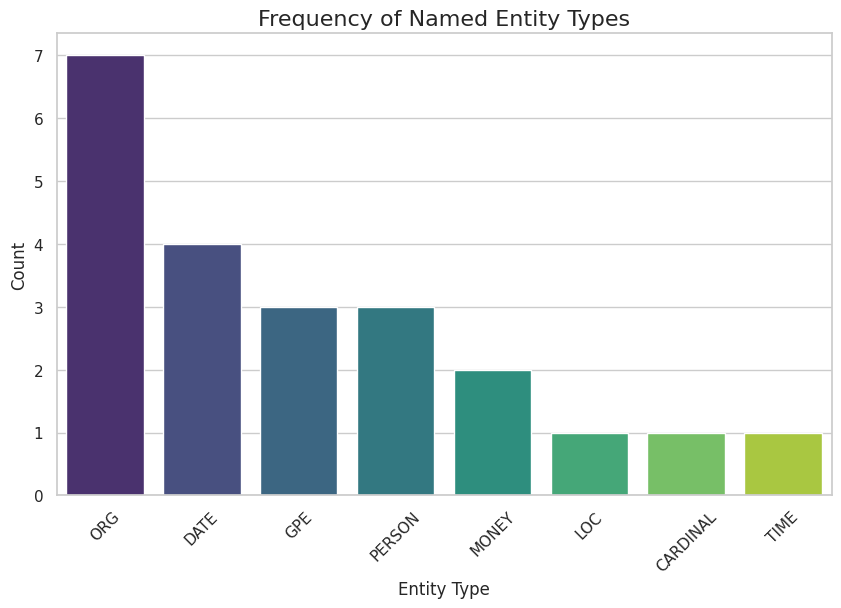

In [6]:
# Set plot style
sns.set_theme(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Count the occurrences of each entity label
entity_counts = df_entities['Label'].value_counts()

# Create a bar plot
sns.barplot(x=entity_counts.index, y=entity_counts.values, palette='viridis')

# Add titles and labels for clarity
plt.title('Frequency of Named Entity Types', fontsize=16)
plt.xlabel('Entity Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()

---

## 6. Inference and Conclusion

The NER model and visualizations confirm that the article is a financial news report about a major corporate acquisition.

1.  **Effectiveness**: The off-the-shelf `en_core_web_sm` model proved highly effective. The `displacy` view shows it correctly identified the key players (`InnovateCorp`, `Anya Sharma`), locations (`Bengaluru`, `Silicon Valley`), and financial figures (`$15 billion`).

2.  **High-Level Insights**: The bar chart instantly confirms the article's focus. The most frequent entity types are **`ORG`** (organizations) and **`DATE`**, followed by `GPE` (locations), `MONEY`, and `PERSON`. This quantitative view validates our qualitative reading of the article.

3.  **Limitations**: The model is not perfect. For instance, the product name `"Prometheus"` was not identified, as the base model isn't trained for a `PRODUCT` category. For highly specialized tasks, one might need to train a custom NER model with domain-specific labels.

**Next Steps:** The structured and visualized data is now primed for powerful downstream applications like building knowledge graphs, automating market analysis reports, or enhancing semantic search engines.